<a href="https://colab.research.google.com/github/zzcn23/Unit2ExcercisesCannon/blob/main/Copy_of_Unit8ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 8 Exercises: The Art of BART

These exercises are grouped into two parts:

- Questions on the nature of decision trees, random forests, and BART models
- An oppurtunity to practice implementing and analyzing a BART model.

Enjoy!

## Bartian Theory

**Task1**:

Draw a decision tree--on a physical piece of paper--that predicts how many calories you burn in a day, using time you spent exercising that day (in minutes) as a predictor.

To help you understand what you're doing with this tree, seperately create an x/y plot with time exercising as x, and calories burned as y.

If this seems to easy, then add another variable or two (type of exercise?), and/or increase the depth of your tree.

You do not have to show me or turn in your tree to earn credit for this question, although I would like to see your drawing.

**Task2**:

What is a decision tree? How do they work?

A decision tree is an algorithm that displays decisions regarding data prediction in a flow chart/tree  structure. They're flexible, able to quickly calculate, and contain decision rules that are easy to compute.

**Task3**:

What does the "depth" of a decision tree mean?

How do I know if a tree is too deep, or not deep enough?

The "depth" of a decision tree refers to how many layers a tree has, or how many decision splits the tree adds before ending up at the final prediction. Often, more depth creates a more comlex model that can capture more intricate patterns. However, adding more depth for simple data sets can lead to overfitting. You can tell if a tree is too deep if it is over fitting data and unable to predict well. You can tell if a tree is not deep enough if the model is underfitting the data and unable to capture important patterns.

**Task4:**

How are BART models similar and different from a decision tree?

Both models use decision trees to deal with data and are able to handle non-linear relationships while capturing data patterns well. However, BART models usually consist of more trees (ensembles)and regulate the model more to prevent underfitting and overfitting.

**Task5**:

Why would we use a BART model instead of a decision tree?

BART models are better at reducing underfitting and overfitting. They're basically fancier versions of decision trees that determine accurate data shapes quickly with more complexity.

## Bartian Penguins

**Task6**:

Create a BART model that uses flipper length, bill depth, and bill length to predict body mass in penguins, and make a ppc to check its fit

Code for loading the data is below. You'll need to do everything else yourself.

Remember to use my notes as a reference, and to copy and paste from them when it makes sense to.

Oh, and try a normal likelihood.

In [1]:
!pip install pymc-bart
!pip install preliz

  Using cached preliz-0.16.0-py3-none-any.whl.metadata (6.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.1/519.1 kB 6.6 MB/s eta 0:00:00


In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
import preliz as pz
import seaborn as sns

In [3]:
from sklearn import tree

In [4]:
#drop the incomplete rows from the data
url="https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/main/Data/penguins.csv"
penguins = pd.read_csv(url).dropna()

In [22]:
#I combine all my predictor variables into one dataframe
X = penguins[['flipper_length',
             'bill_depth',
             'bill_length',
]]
Y = penguins['body_mass'].to_numpy()

In [26]:
with pm.Model() as model_penguinR:
    s = pm.HalfNormal('s',19) #sigma = 20 is a blind guess
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50) #log around Y
    μ = pm.Deterministic("μ",pm.math.exp(μ_)) #exp it all once BART is done
    y = pm.Normal("y", mu=μ, sigma=s,  observed=Y) #likelihood
    idata_penguinR = pm.sample(compute_convergence_checks=False)

 Progress                    Draws   Divergences   Step size   Grad evals   Sampling Speed   Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             0.87        1            32.16 draws/s    0:01:02   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.28        1            15.33 draws/s    0:02:10   0:00:00

Output()

<Axes: xlabel='y'>

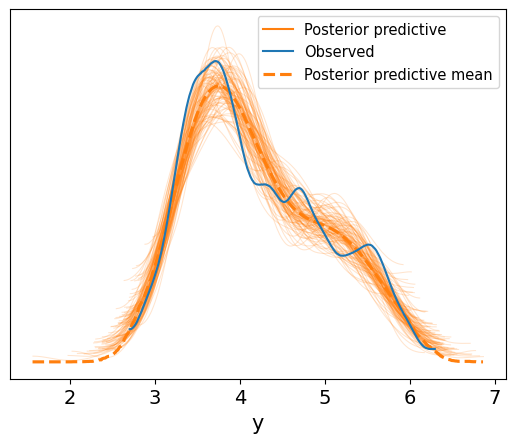

In [27]:
#generate the posterior predictive dist
pm.sample_posterior_predictive(idata_penguinR,model_penguinR, extend_inferencedata=True)
az.plot_ppc(idata_penguinR, num_pp_samples=100, colors=["C1", "C0", "C1"])

**Task7**:

Plot flipper length versus body mass,

and then plot the posterior predictve from the model over the data.
You're going to copy paste the plotting code from the notes, fyi.

In [11]:
#I combine all my predictor variables into one dataframe
X = penguins['flipper_length'].to_numpy().reshape(-1, 1)
Y = penguins['body_mass'].to_numpy()

In [12]:
with pm.Model() as model_penguin:
    s = pm.HalfNormal('s',19) #sigma = 20 is a blind guess
    μ_ = pmb.BART("μ_", X, np.log(Y), m=50) #log around Y
    μ = pm.Deterministic("μ",pm.math.exp(μ_)) #exp it all once BART is done
    y = pm.Normal("y", mu=μ, sigma=s,  observed=Y) #likelihood
    idata_penguin = pm.sample(compute_convergence_checks=False)

 Progress                    Draws   Divergences   Step size   Grad evals   Sampling Speed   Elapsed   Remaining  
 ───────────────────────────────────────────────────────────────────────────────────────────────────────────────── 
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             0.97        1            30.25 draws/s    0:01:06   0:00:00    
  ━━━━━━━━━━━━━━━━━━━━━━━━━   2000    0             1.16        1            14.95 draws/s    0:02:13   0:00:00

Output()

<Axes: xlabel='y'>

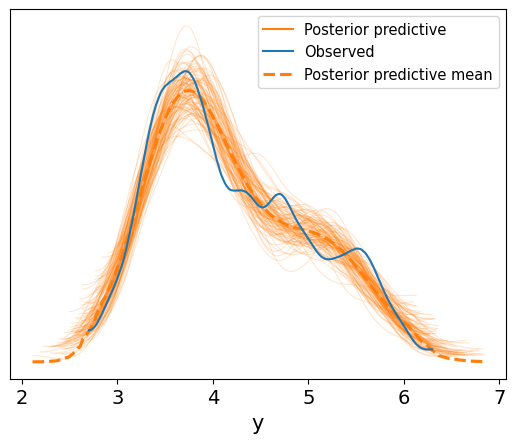

In [14]:
#generate the posterior predictive dist
pm.sample_posterior_predictive(idata_penguin,model_penguin, extend_inferencedata=True)
az.plot_ppc(idata_penguin, num_pp_samples=100, colors=["C1", "C0", "C1"])

**Task8**:

Interpret the plot above in context. Do you think it captures the true association between flipper length and body mass in penguins? Why or why not? Make sure to reference specific things you see in the plot.

I think the plot interprets the relationship between flipper length and body mass relatively well. It captures the initial positive relationship between the two and then the overall negative trend after flipper length is over 4. However it doesn't perfectly capture the smaller spikes around flipper length = 5.

**Task9**:

Create partial depnedence plots (pdps), individual conditional expectation (ice) plots, and a variable importance plot for the BARTpenguin model.

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='bill_length'>], dtype=object)

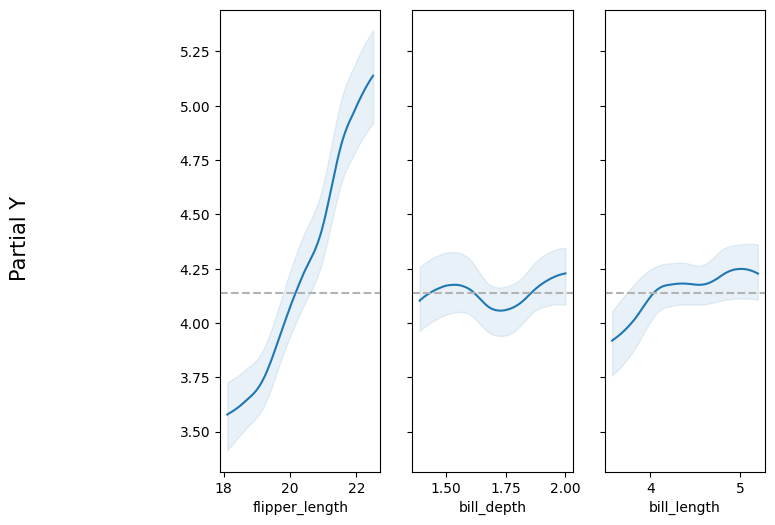

In [28]:
pmb.plot_pdp(μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

array([<Axes: xlabel='flipper_length'>, <Axes: xlabel='bill_depth'>,
       <Axes: xlabel='bill_length'>], dtype=object)

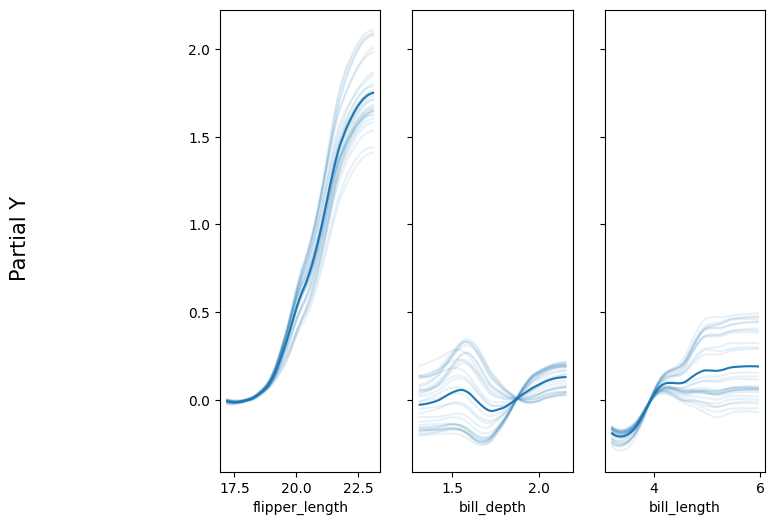

In [29]:
pmb.plot_ice( μ_, X, Y, grid=(1, 5), func=np.exp, figsize = (12,6))

In [30]:
vi_penguins = pmb.compute_variable_importance(idata_penguinR, μ_, X)

<Axes: ylabel='R²'>

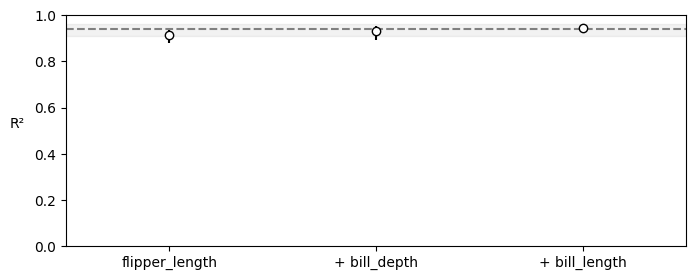

In [32]:
pmb.plot_variable_importance(vi_penguins)

**Task10**:

Using the above plots, make an argument about which variable(s) is/are most important in predicting body mass in penguins.

What is the relationship for each variable to body mass, when you take the other variables into account?

Is that relationship complicated by interactions between variables? How do you know?

Make sure to reference specific things you see in each plot, to justify your decisions and comments.

Looking especially at the vi graph, all of the variables are important in predicting body mass in penguins. However, flipper length has the strongest correlation to body mass given the other variables as it has a high positive slope, showing that the longer a penguins flippers are, the bigger its body mass is. Bill length and depth are a little more uncertain but there's still a general positive trend between the two and body mass, with bill length being a slightly better predictor. The ice plot does tell us that bill depth has interactions with other variables as the lines are less parallel than the other ones and change at one spot when the slope changes.